# PROBALISTIC REASONING
## Name : Guruprasath M R
## Roll : CH.EN.U4AIE22015
### LAB-2

## Maximum Likelihood Estimation (MLE) for a normal distribution is given by:  

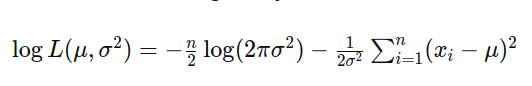  
where μ is  the mean, σ square  is the variance, and xi are the observed data points.
### Explanation:
   - The log-likelihood function for a normal distribution is defined. It calculates the log-likelihood based on the parameters `mu`   
      (mean) and `sigma` (standard deviation). If `sigma` is non-positive, the function returns negative infinity to ensure valid parameter estimates.

   - The sample mean and sample standard deviation are used as the initial guesses for the optimization process.

   - The `minimize` function from `scipy.optimize` is used to find the parameter values that maximize the log-likelihood function. This is done by minimizing  
           the negative of the log-likelihood function. The `bounds` argument ensures that `sigma` remains positive by setting a lower bound of `1e-6`. 

### Formula for MLE:
The Maximum Likelihood Estimates (MLE) for the mean μ and the variance σ square of a normal distribution are derived by maximizing the log-likelihood function.     
 For a sample of  n observations x1, x2, .., xn, the MLE for the mean and variance are given by:  
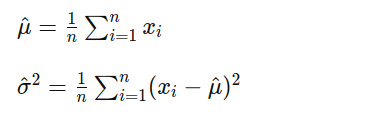


the sample data:
 [ 5.99342831  4.7234714   6.29537708  8.04605971  4.53169325  4.53172609
  8.15842563  6.53486946  4.06105123  6.08512009  4.07316461  4.06854049
  5.48392454  1.17343951  1.55016433  3.87542494  2.97433776  5.62849467
  3.18395185  2.1753926   7.93129754  4.5484474   5.13505641  2.15050363
  3.91123455  5.22184518  2.69801285  5.75139604  3.79872262  4.4166125
  3.79658678  8.70455637  4.97300555  2.88457814  6.64508982  2.5583127
  5.41772719  1.08065975  2.3436279   5.39372247  6.47693316  5.34273656
  4.76870344  4.39779261  2.04295602  3.56031158  4.07872246  7.11424445
  5.68723658  1.47391969  5.64816794  4.22983544  3.646156    6.22335258
  7.06199904  6.86256024  3.32156495  4.38157525  5.66252686  6.95109025
  4.04165152  4.62868205  2.78733005  2.60758675  6.62505164  7.71248006
  4.85597976  7.0070658   5.72327205  3.70976049  5.72279121  8.07607313
  4.92834792  8.12928731 -0.23949021  6.64380501  5.17409414  4.4019853
  5.18352155  1.02486217  4.56065622

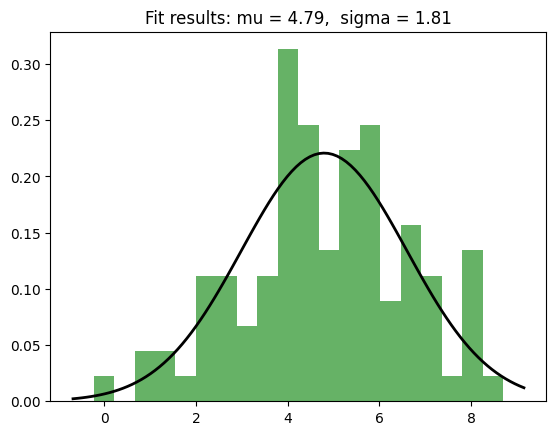

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Generate sample data from a normal distribution
np.random.seed(42)
sample_data = np.random.normal(loc=5.0, scale=2.0, size=100)
print("the sample data:\n",sample_data)
# Define the log-likelihood function for a normal distribution
def log_likelihood(params, data):
    mu, sigma = params[0], params[1]
    if sigma <= 0:
        return -np.inf  # Return negative infinity if sigma is not positive
    n = len(data)
    return -((n / 2) * np.log(2 * np.pi * sigma ** 2) + (1 / (2 * sigma ** 2)) * np.sum((data - mu) ** 2))

# Initial guess for the parameters (mean and standard deviation)
initial_guess = [np.mean(sample_data), np.std(sample_data, ddof=1)]

# Perform the optimization to maximize the log-likelihood (minimize its negative)
result = minimize(lambda params: -log_likelihood(params, sample_data), initial_guess, \
                    method='L-BFGS-B', bounds=[(None, None), (1e-6, None)])

# The estimated parameters (mean and standard deviation)
mle_mean, mle_sigma = result.x

print(f"MLE for the mean: {mle_mean}")
print(f"MLE for the standard deviation: {mle_sigma}")

# Plot the data and the fitted distribution
plt.hist(sample_data, bins=20, density=True, alpha=0.6, color='g')

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mle_mean) / mle_sigma) ** 2) / (mle_sigma * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  sigma = %.2f" % (mle_mean, mle_sigma)
plt.title(title)

plt.show()
